In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("credit_card_fraud.csv")

In [3]:
df.shape

(8000, 20)

In [4]:
df.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Merchant Name,Transaction Source,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,Previous Transactions,IP Address,Device Information,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,24-09-2022,285.88,Shray Soman,"Rajagopalan, Ghose and Kant",Online,3590.0,Khammam,INR,MasterCard,01-04-2029,NaN,18.106.240.6,Tablet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24-07-2020,1777.32,Lakshit Bakshi,Sule PLC,Online,7277.0,Vasai-Virar,EUR,American Express,01-03-2026,NaN,212.48.185.128,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-03-2023,3939.01,Riya Bobal,Badal PLC,In-Person,9297.0,Nangloi Jat,USD,Visa,01-11-2029,3 or more,17.190.112.46,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07-01-2021,376.44,Mohanlal Balakrishnan,Konda-Sodhi,In-Person,5686.0,Ramagundam,USD,Visa,01-09-2025,2,153.136.24.104,Tablet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16-12-2021,1687.33,Mannat Rout,Dua Ltd,Online,2940.0,Adoni,INR,MasterCard,01-03-2031,2,196.153.28.131,Desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Merchant Name                            8000 non-null   object 
 4   Transaction Source                       8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   float64
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  Previous Transactions                    5957 no

In [6]:
df.describe()

,Transaction Amount,Merchant Category Code (MCC),Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,8000.000000,8000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2496.356036,5484.150375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1451.221326,2608.164617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.090000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1242.580000,3230.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2492.460000,5455.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3739.522500,7761.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4996.700000,9999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
missing_percent = df.isnull().mean() * 100
missing_percent

,0
Transaction Date and Time,0.0000
Transaction Amount,0.0000
Cardholder Name,0.0000
Merchant Name,0.0000
Transaction Source,0.0000
Merchant Category Code (MCC),0.0000
Transaction Location (City or ZIP Code),0.0000
Transaction Currency,0.0000
Card Type,0.0000
Card Expiration Date,0.0000


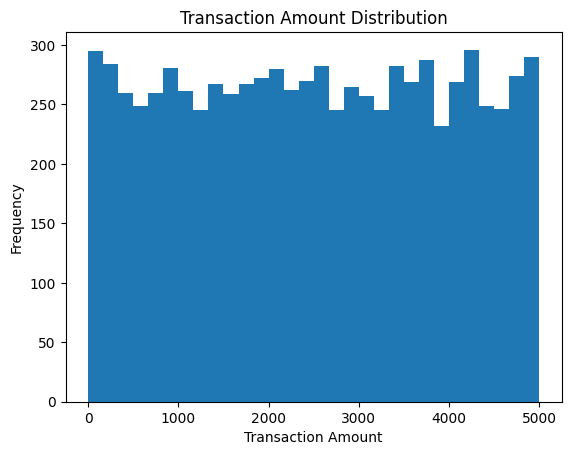

In [8]:
plt.hist(df['Transaction Amount'], bins=30)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Amount Distribution")
plt.show()

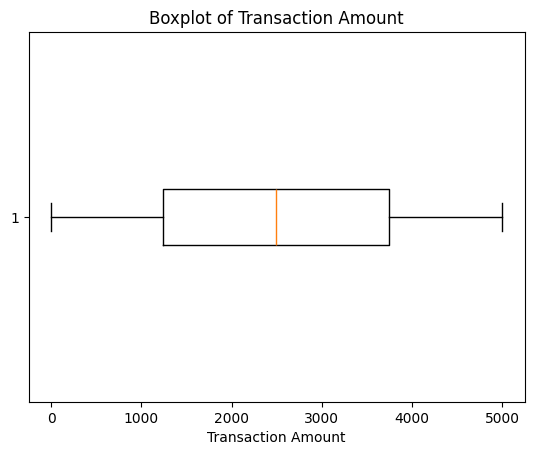

In [9]:
plt.boxplot(df['Transaction Amount'], vert=False)
plt.xlabel("Transaction Amount")
plt.title("Boxplot of Transaction Amount")
plt.show()

In [10]:
Q1 = df['Transaction Amount'].quantile(0.25)
Q3 = df['Transaction Amount'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(np.float64(1242.58), np.float64(3739.5225), np.float64(2496.9425))

In [11]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

lower_limit, upper_limit

(np.float64(-2502.8337500000002), np.float64(7484.936250000001))

In [17]:
df['outlier_flag'] = np.where(
    (df['Transaction Amount'] < lower_limit) |
    (df['Transaction Amount'] > upper_limit),
    1,
    0
)
df['outlier_flag'].value_counts()

,count
outlier_flag,
0,8000


In [16]:
df_cleaned = df[df['outlier_flag'] == 0]
df_cleaned.shape

(8000, 21)

In [18]:
corr = df_cleaned.corr(numeric_only=True)
corr

,Transaction Amount,Merchant Category Code (MCC),Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,outlier_flag
Transaction Amount,1.000000,0.014796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchant Category Code (MCC),0.014796,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlier_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)